<a href="https://colab.research.google.com/github/Offcute/CF-DashApp/blob/main/Test_Survey_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test Survey with ML

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

# List files to make sure we're in the expected directory.
# Your output will look different, showing your own Drive files here.


!ls

Mounted at /content/drive
/content/drive/MyDrive
 AssEco.gdoc
 Beginning.Python.Visualization.Crafting.Visual.Transformation.Scripts.Shai.Vaingast.2009.pdf
 BookTemplate.pdf
'Colab Notebooks'
 DataVisualization.gdoc
 DataVisualization.pdf
 ISproject_documents
'ITM6304 Quiz and Exercise'
 JBreferences
'Learning Tableau 2019 Tools for Business Intelligence, data prep, and visual analytics.pdf'
'New Headphone Production Survey Complete.csv'
'New Headphone Production Survey Complete.gsheet'
'New Headphone Production Survey for ML.csv'
'New Headphone Production Survey (Responses).gsheet'
 __pycache__
'Report and video adjusting by MATLAB'
 RuleBased_Classification.py
 Survey_MLclassification.py
'Total responses categorized characteristic survey.csv'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)  # or 199
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)

df = pd.read_csv("New Headphone Production Survey for ML.csv")


In [3]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# df3 = pd.concat([df]*20, ignore_index=True)

# train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)

# X_train = train_df.drop("HpAnswer", axis=1)
# Y_train = train_df["HpAnswer"]
# X_test  = test_df.drop("HpAnswer", axis=1)
# Y_test  = test_df["HpAnswer"]


In [4]:
#importanct features

df3 = pd.concat([df]*20, ignore_index=True)

train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)

X_train = train_df.drop(labels=['Gender','Age','Status','Education','Occupation','HpAnswer'],axis=1)
Y_train = train_df["HpAnswer"]
X_test  = test_df.drop(labels=['Gender','Age','Status','Education','Occupation','HpAnswer'],axis=1)
Y_test  = test_df["HpAnswer"]

# X_train = train_df.drop("HpAnswer", axis=1)
# Y_train = train_df["HpAnswer"]
# X_test  = test_df.drop("HpAnswer", axis=1)
# Y_test  = test_df["HpAnswer"]

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
Y3           = random_forest.predict_proba(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
#print(classification_report(Y_test, Y_prediction))
#print(acc_random_forest)
#print(Y_prediction,Y3)

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
#importances_cut = importances.loc[importances['feature']!=['Gender','Age','Status','Education','Occupation']]
#importances_qicks = importances.drop(labels=['Gender','Age','Status','Education','Occupation'],axis=0)
#importances_qicks = importances_qicks.sort_values(by=['importance'])
importances


,importance
feature,
FactorHps,0.136
PriceHps,0.101
ActivityHps,0.092
InnovationHps,0.081
PlaceHps,0.057
InfoHps_PR,0.053
InfoHps_Google,0.046
HealthHps,0.040
PB_disconnect,0.039


In [5]:

# X_train = train_df[['Gender','Age','Status','Education','Occupation']]
# Y_train = train_df["HpAnswer"]
# X_test = test_df[['Gender','Age','Status','Education','Occupation']]
# Y_test  = test_df["HpAnswer"]
#      colname=['Gender','Age','Status','Education','Occupation','HpAnswer','NumberHps', 'ActivityHps', 'TimeHps','PriceHps','PlaceHps','FactorHps','HealthHps','InnovationHps',\
#              "PB_nosound","PB_disconnect","PB_badsound","PB_unfit","PB_oneear","PB_toosd","PB_audiocut","PB_battery",\
#              "PB_unplug","InfoHps_online","InfoHps_Social","InfoHps_Google","InfoHps_Store","InfoHps_PR","InfoHps_Ads"]
colname=['ActivityHps','PriceHps','PlaceHps','FactorHps','InnovationHps',\
    "InfoHps_online","InfoHps_Store","InfoHps_PR"]
X_train = train_df[colname]
Y_train = train_df["HpAnswer"]
X_test  = test_df[colname]
Y_test  = test_df["HpAnswer"]

# X_train = train_df[['FactorHps','PriceHps','ActivityHps','InnovationHps','PlaceHps',"InfoHps_PR","InfoHps_online","InfoHps_Store"]]
# Y_train = train_df["HpAnswer"]
# X_test = test_df[['FactorHps','PriceHps','ActivityHps','InnovationHps','PlaceHps',"InfoHps_PR","InfoHps_online","InfoHps_Store"]]
# Y_test  = test_df["HpAnswer"]

# X_train = train_df.drop(['Gender','Age','Status','Education','Occupation','HpAnswer'], axis=1)
# Y_train = train_df["HpAnswer"]
# X_test  = test_df.drop(['Gender','Age','Status','Education','Occupation','HpAnswer'], axis=1)
# Y_test  = test_df["HpAnswer"]

# X_train = train_df.drop("HpAnswer", axis=1)
# Y_train = train_df["HpAnswer"]
# X_test  = test_df.drop("HpAnswer", axis=1)
# Y_test  = test_df["HpAnswer"]

In [6]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
Y3           = random_forest.predict_proba(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [7]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [8]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
Y3     = logreg.predict_proba(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
#print(classification_report(Y_test, Y_pred))
#print(acc_log)
#print(Y_pred,Y3)

In [9]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)


In [10]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [11]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [12]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [13]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
Y3           = decision_tree.predict_proba(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
#print(classification_report(Y_test, Y_pred))
#print(acc_log)
#print(Y_pred,Y3)

In [14]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.61,KNN
98.61,Random Forest
98.61,Decision Tree
71.83,Naive Bayes
65.08,Logistic Regression
64.29,Support Vector Machines
49.01,Stochastic Gradient Decent
45.34,Perceptron


<Axes: xlabel='feature'>

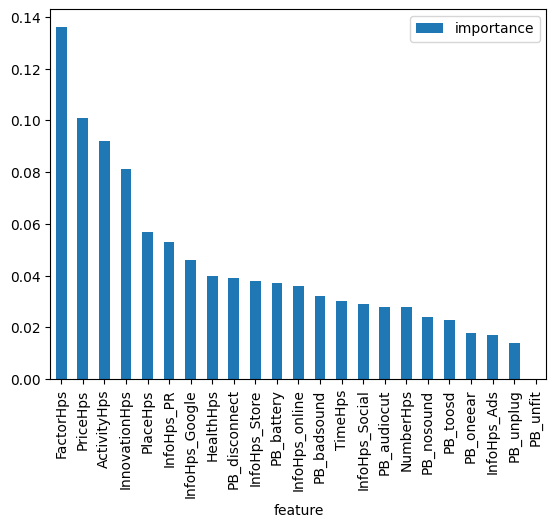

In [15]:
importances.plot.bar()


In [16]:
!pip install dash

from dash import dcc

def feature_importance():
    return importances
colnames=['FactorHps','ActivityHps','PriceHps','InnovationHps']
xts = pd.DataFrame(np.array([[1,1,1,1]]),columns=colnames)
#xts = np.unique(['NumberHps', 'NumberHps', 'TimeHps'])
xts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.6 MB/s eta 0:00:00


,FactorHps,ActivityHps,PriceHps,InnovationHps
0,1,1,1,1


In [17]:
def predict_input(que1,que2,que3,que4,ans1,ans2,ans3,ans4):
    X1=({que1: [ans1],
        que2: [ans2],
        que3: [ans3],
        que4: [ans4]})

    #X1 = ({'Gender':[0], 'Age': [2], 'Status':[0], 'Education':[1],'Occupation': [2]})

    dfs = pd.DataFrame(X1)

    return dfs

In [18]:
def MLdecision_tree(xtest):
    X_train = train_df[xtest.columns.values]
    Y_train = train_df["HpAnswer"]
    random_forest = RandomForestClassifier(n_estimators=100)

    X_test  = test_df[xtest.columns.values]
    Y_test  = test_df["HpAnswer"]
    random_forest.fit(X_train, Y_train)
    Y_pred = random_forest.predict(X_test)
    Y3           = random_forest.predict_proba(X_test)

    Y_train = train_df["HpAnswer"]
    random_forest.fit(X_train, Y_train)
    Y_pred_hp = random_forest.predict(xtest)
    Y3           = random_forest.predict_proba(xtest)
    acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
    print("acc_random_forest_hp:",acc_random_forest)

    Y_train = train_df["Gender"]
    random_forest.fit(X_train, Y_train)
    Y_pred_gender = random_forest.predict(xtest)
    acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
    print("acc_random_forest_gender:",acc_random_forest)

    Y_train = train_df["Age"]
    random_forest.fit(X_train, Y_train)
    Y_pred_age = random_forest.predict(xtest)
    acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
    print("acc_random_forest_age:",acc_random_forest)

    Y_train = train_df["Status"]
    random_forest.fit(X_train, Y_train)
    Y_pred_status = random_forest.predict(xtest)
    acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
    print("acc_random_forest_status:",acc_random_forest)

    Y_train = train_df["Education"]
    random_forest.fit(X_train, Y_train)
    Y_pred_edu = random_forest.predict(xtest)
    acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
    print("acc_random_forest_edu:",acc_random_forest)

    Y_train = train_df["Occupation"]
    random_forest.fit(X_train, Y_train)
    Y_pred_occ = random_forest.predict(xtest)
    acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
    print("acc_random_forest_occ:",acc_random_forest)

    if Y_pred_hp[0] == 1 : charac_hp = "HP1"
    if Y_pred_hp[0] == 2 : charac_hp = "HP2"
    if Y_pred_hp[0] == 3 : charac_hp = "HP3"

    if Y_pred_gender[0] == 0 : charac_gender = "female"
    if Y_pred_gender[0] == 1 : charac_gender = "male"

    if Y_pred_age[0] == 1 : charac_age = "20-27"
    if Y_pred_age[0] == 2 : charac_age = "28-35"
    if Y_pred_age[0] == 3 : charac_age = "36-45"

    if Y_pred_status[0] == 0 : charac_status = "single"
    if Y_pred_status[0] == 1 : charac_status = "married"

    if Y_pred_edu[0] == 1 : charac_edu = "graduate"
    if Y_pred_edu[0] == 2 : charac_edu = "undergraduate"
    if Y_pred_edu[0] == 3 : charac_edu = "high school"
    if Y_pred_edu[0] == 4 : charac_edu = "unspecified education"

    if Y_pred_occ[0] == 1 : charac_occ = "student"
    if Y_pred_occ[0] == 2 : charac_occ = "employee"
    if Y_pred_occ[0] == 3 : charac_occ = "business owner"
    if Y_pred_occ[0] == 4 : charac_occ = "unspecified occupation"

    #acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
    print(classification_report(Y_test, Y_pred))
    #print("acc_decision_tree:",label,acc_decision_tree)
    #print(Y_pred,Y3)
    return charac_hp,charac_gender,charac_age,charac_status,charac_edu,charac_occ,Y_pred_hp[0],Y_pred_gender[0],\
          Y_pred_age[0],Y_pred_status[0],Y_pred_occ[0],Y_pred_edu[0],Y3

In [19]:
MLdecision_tree(xts)

acc_random_forest_hp: 92.96
acc_random_forest_gender: 96.33
acc_random_forest_age: 94.74
acc_random_forest_status: 97.52
acc_random_forest_edu: 90.08
acc_random_forest_occ: 94.35
              precision    recall  f1-score   support

           1       0.88      0.76      0.81        58
           2       0.91      0.98      0.94       245
           3       1.00      0.93      0.96       129

    accuracy                           0.93       432
   macro avg       0.93      0.89      0.91       432
weighted avg       0.93      0.93      0.93       432



('HP2',
 'female',
 '36-45',
 'married',
 'high school',
 'unspecified occupation',
 2,
 0,
 3,
 1,
 4,
 3,
 array([[0.06, 0.94, 0.  ]]))

In [20]:
dfs = predict_input('FactorHps','ActivityHps','PriceHps','InnovationHps',2,1,1,2)
dfs.columns.values

array(['FactorHps', 'ActivityHps', 'PriceHps', 'InnovationHps'],
      dtype=object)

In [21]:
# X_train = train_df.drop("HpAnswer", axis=1)
# Y_train = train_df[["HpAnswer"]]
# X_test  = test_df.drop("HpAnswer", axis=1)
# Y_test  = test_df[["HpAnswer"]]
xt = pd.DataFrame([{'FactorHps':1,'PriceHps':2,'ActivityHps':3}])
xt.columns.values

array(['FactorHps', 'PriceHps', 'ActivityHps'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(Y_train)
y_onehot_test = label_binarizer.transform(Y_test)
y_onehot_test.shape  # (n_samples, n_classes)

#label_binarizer.transform([1])

(432, 3)

In [23]:
# class_of_interest = 1
# class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
# class_id

In [24]:
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
# df3 = pd.concat([df]*20, ignore_index=True)

# train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)
# features = ['FactorHps','PriceHps','ActivityHps']
# X_train = train_df[features]
# Y_train = train_df["HpAnswer"]
# X_test  = test_df[features]
# Y_test  = test_df["HpAnswer"]

# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_train, Y_train)
# y_score = decision_tree.fit(X_train, Y_train).predict_proba(X_test)

def getROCfigure(htype,features,label,tname):
    df3 = pd.concat([df]*20, ignore_index=True)

    train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)

    X_train = train_df[features]
    Y_train = train_df[label]
    X_test  = test_df[features]
    Y_test  = test_df[label]
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    if(label == "HpAnswer") or (label == "Age") or (label == "Education") or (label == "Occupation"):

        label_binarizer = LabelBinarizer().fit(Y_train)
        y_onehot_test = label_binarizer.transform(Y_test)
        y_onehot_test.shape  # (n_samples, n_classes)

        class_of_interest = int(htype)
        y_score = decision_tree.fit(X_train, Y_train).predict_proba(X_test)
        class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

        y_score = decision_tree.fit(X_train, Y_train).predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_onehot_test[:, class_id], y_score[:, class_id])
        fig = px.area(
            x=fpr, y=tpr,
            title=f'<b>ROC Curve (AUC={auc(fpr, tpr):.4f}){tname}</b>',
            labels=dict(x='False Positive Rate', y='True Positive Rate'),
            width=700, height=500
         )

    if (label == "Gender"):
        y_score = decision_tree.fit(X_train, Y_train).predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(np.array(Y_test), y_score)
        fig = px.area(
            x=fpr, y=tpr,
            title=f'<b>ROC Curve (AUC={auc(fpr, tpr):.4f}) of Female 0 - Male 1</b>',
            labels=dict(x='False Positive Rate', y='True Positive Rate'),
            width=700, height=500
         )
    if (label == "Status"):
        y_score = decision_tree.fit(X_train, Y_train).predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(np.array(Y_test), y_score)
        fig = px.area(
            x=fpr, y=tpr,
            title=f'<b>ROC Curve(AUC={auc(fpr, tpr):.3f})Single 0-Married 1</b>',
            labels=dict(x='False Positive Rate', y='True Positive Rate'),
            width=700, height=500
         )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
    fig.update_layout(width=270,height=270, font=dict(size=7),margin=dict(l=10, r=10, t=30, b=10))
    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    return fig

In [25]:
getROCfigure(1,['FactorHps','PriceHps','ActivityHps'],'Status',0)


In [26]:
getROCfigure(1,['FactorHps','PriceHps','ActivityHps'],'HpAnswer','HP1')


In [27]:
getROCfigure(2,['FactorHps','PriceHps','ActivityHps'],'HpAnswer','HP2')


In [28]:

getROCfigure(3,xt.columns.values,'HpAnswer','HP3')


In [29]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

def getROCfigure2(features,label):

    df3 = pd.concat([df]*20, ignore_index=True)

    train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)

    X_train = train_df[features]
    Y_train = train_df[label]
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)

    y_scores = decision_tree.predict_proba(X_train)
    # One hot encode the labels in order to plot them
    y_onehot = pd.get_dummies(Y_train, columns=decision_tree.classes_)
    # Create an empty figure, and iteratively add new lines
    # every time we compute a new class
    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)

        if(label == "HpAnswer"):
            if y_onehot.columns[i] == 1 : attrcol = "HP1"
            if y_onehot.columns[i] == 2 : attrcol = "HP2"
            if y_onehot.columns[i] == 3 : attrcol = "HP3"
        elif(label == "Gender"):
            if y_onehot.columns[i] == 0 : attrcol = "F"
            if y_onehot.columns[i] == 1 : attrcol = "M"
        elif(label == "Age"):
            if y_onehot.columns[i] == 1 : attrcol = "20-27"
            if y_onehot.columns[i] == 2 : attrcol = "28-35"
            if y_onehot.columns[i] == 3 : attrcol = "36-45"
        elif(label == "Status"):
            if y_onehot.columns[i] == 0 : attrcol = "S"
            if y_onehot.columns[i] == 1 : attrcol = "M"
        elif(label == "Education"):
            if y_onehot.columns[i] == 1 : attrcol = "G"
            if y_onehot.columns[i] == 2 : attrcol = "U"
            if y_onehot.columns[i] == 3 : attrcol = "H"
            if y_onehot.columns[i] == 4 : attrcol = "O"
        elif(label == "Occupation"):
            if y_onehot.columns[i] == 1 : attrcol = "S"
            if y_onehot.columns[i] == 2 : attrcol = "E"
            if y_onehot.columns[i] == 3 : attrcol = "B"
            if y_onehot.columns[i] == 4 : attrcol = "O"

        name = f"{attrcol}(AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))
    if(label == "HpAnswer"):
        labels="Headphone Type"
    else:
        labels= label
    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        title=f'ROC Curve of {labels}',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=500,height=450,
        font=dict(size=12),margin=dict(l=10, r=10, t=50, b=10))
    return fig

def getROCfigure3(features,label,tname):

    df3 = pd.concat([df]*20, ignore_index=True)

    train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)

    X_train = train_df[features]
    Y_train = train_df[label]
    X_test  = test_df[features]
    Y_test  = test_df[label]
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    # # Fit the model
    # model = LogisticRegression(max_iter=200)
    # model.fit(X, y)
    y_scores = decision_tree.predict_proba(X_test)
    # One hot encode the labels in order to plot them
    y_onehot = pd.get_dummies(Y_test, columns=decision_tree.classes_)

    # Create an empty figure, and iteratively add new lines
    # every time we compute a new class
    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)

        name = f"{y_onehot.columns[i]}(AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        title=f'ROC Curve of {tname}',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        font=dict(size=12),margin=dict(l=10, r=10, t=50, b=10))
    return fig


In [30]:
colname

['ActivityHps',
 'PriceHps',
 'PlaceHps',
 'FactorHps',
 'InnovationHps',
 'InfoHps_online',
 'InfoHps_Store',
 'InfoHps_PR']

In [31]:
getROCfigure2(colname,'HpAnswer')


In [32]:
colnames

['FactorHps', 'ActivityHps', 'PriceHps', 'InnovationHps']

In [33]:
getROCfigure2(colnames,'HpAnswer')


In [34]:
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import plotly.express as px

def getConfusionMatrix(features,label):

    df3 = pd.concat([df]*20, ignore_index=True)

    train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)

    X_train = train_df[features]
    Y_train = train_df[label]
    X_test  = test_df[features]
    Y_test  = test_df[label]

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    Y_pred = decision_tree.predict(X_test)
    cm = confusion_matrix(Y_test,Y_pred,normalize='true')
    cm1 = np.round(cm,2)
    #print(Y_train.value_counts().index.shape[0])
    #list(map(str,Y_train.value_counts().index.sort_values()))
    if(label == "HpAnswer"):
        ac = ['HP1','HP2','HP3']
    elif(label == "Gender"):
        ac = ['F','M']
    elif(label == "Age"):
        ac = ['20-27','28-35', '36-45']
    elif(label == "Status"):
        ac = ['S','M']
    elif(label == "Education"):
        ac = ['G','U','H','O']
    elif(label == "Occupation"):
        if(Y_train.value_counts().index.shape[0]==3):
           ac = ['E','B','O']
        else:
           ac = ['S','E','B','O']

    fig = px.imshow(cm1,
                    labels=dict(x="Predicted label", y="True label"),
                    color_continuous_scale='blues',
                    aspect="auto",
                    x = ac,
                    y = ac,
                  # title='Normalized confusion matrix',
                    text_auto=True)
    fig.update_xaxes(side="bottom")
    fig.update_layout(width=300,height=300, font=dict(size=12),margin=dict(l=10, r=10, t=10, b=10))
    fig.update_coloraxes(showscale=False)

    return fig

In [35]:
getConfusionMatrix(colnames,'HpAnswer')

In [36]:
!pip install dalex

import dalex as dx


from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

df3 = pd.concat([df]*20, ignore_index=True)

train_df,test_df = train_test_split(df3, test_size=0.3, random_state=42, shuffle=True)

X = train_df[['Gender','Age','Status','Education','Occupation','FactorHps', 'ActivityHps', 'PriceHps']]
y = train_df["HealthHps"]

numerical_features = ['Gender','Age','Status','Education','Occupation','FactorHps', 'ActivityHps', 'PriceHps']
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

# categorical_features = ['gender', 'class', 'embarked']
# categorical_transformer = Pipeline(
#     steps=[
#         ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#         ('onehot', OneHotEncoder(handle_unknown='ignore'))
#     ]
# )

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
       # ('cat', categorical_transformer, categorical_features)
    ]
)

classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=500, random_state=0)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.1-py3-none-any.whl size=1042797 sha256=546a40718b6cddd6e6114a78fdef5e7c3d6878263fdf5c4692f01dd067702c3e
  Stored in directory: /root/.cache/pip/wheels/fe/c2/41/63e006b3312a4e17299bed5f83d985dea872368f9ab16bb20f
Successfully built dalex


In [37]:
clf.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'Age', 'Status',
                                                   'Education', 'Occupation',
                                                   'FactorHps', 'ActivityHps',
                                                   'PriceHps'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=500,
                               random_state=0))])

In [38]:
exp = dx.Explainer(clf, X, y)


Preparation of a new explainer is initiated

  -> data              : 1008 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1008 values
  -> model_class       : sklearn.neural_network._multilayer_perceptron.MLPClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7b71e9f588b0> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 4.02e-08, mean = 0.614, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.323, mean = 0.00474, max = 0.677
  -> model_info        : package sklearn

A new explainer has been created!


In [39]:
# ['Gender','Age','Status','Education','Occupation','HpAnswer','NumberHps', 'ActivityHps', 'TimeHps',\
#                       'PriceHps','PlaceHps','FactorHps','HealthHps','InnovationHps',"PB_nosound","PB_disconnect","PB_badsound",\
#                       "PB_unfit","PB_oneear","PB_toosd","PB_audiocut","PB_battery","PB_unplug","InfoHps_online",\
#                       "InfoHps_Social","InfoHps_Google","InfoHps_Store","InfoHps_PR","InfoHps_Ads"]

me = pd.DataFrame({'Gender': [0],
                   'Age': [2],
                   'Status': [1],
                   'Education':[2],
                   'Occupation':[2],
                   'FactorHps':[1],
                   'ActivityHps':[2],
                   'PriceHps':[1]},
                    index = ['Me'])

In [40]:
exp.predict(me)


array([6.92954416e-05])

In [41]:
bd_me = exp.predict_parts(me, type='break_down', label=me.index[0])
# bd_interactions_me = exp.predict_parts(me, type='break_down_interactions', label="me+")

# sh_me = exp.predict_parts(me, type='shap', B = 10, label=me.index[0])

In [42]:
bd_me.result


,variable_name,variable_value,variable,cumulative,contribution,sign,position,label
0,intercept,,intercept,0.614307,0.614307,1.0,9,Me
1,PriceHps,1.0,PriceHps = 1.0,0.743928,0.129621,1.0,8,Me
2,Education,2.0,Education = 2.0,0.769384,0.025456,1.0,7,Me
3,Occupation,2.0,Occupation = 2.0,0.885900,0.116516,1.0,6,Me
4,Gender,0.0,Gender = 0.0,0.834517,-0.051383,-1.0,5,Me
5,Age,2.0,Age = 2.0,0.840359,0.005843,1.0,4,Me
6,FactorHps,1.0,FactorHps = 1.0,0.843857,0.003498,1.0,3,Me
7,ActivityHps,2.0,ActivityHps = 2.0,0.768682,-0.075175,-1.0,2,Me
8,Status,1.0,Status = 1.0,0.000069,-0.768613,-1.0,1,Me
9,,,prediction,0.000069,0.000069,1.0,0,Me


In [43]:
bd_me.plot()


In [44]:
import dalex as dx

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

X = train_df[['Gender','Age','Status','Education','Occupation','FactorHps', 'ActivityHps', 'PriceHps', 'InnovationHps']]
y = train_df["HpAnswer"]

model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)
model.predict_proba(X).shape

(1008, 3)

In [45]:
# custom (binary) predict function
pf_0 = lambda m, d: m.predict_proba(d)[:, 0]

# custom (binary) target values
y_0 = y == 1

# explainer
exp_0 = dx.Explainer(model, X, y_0, predict_function=pf_0, label="RFClassifier: class 0")

Preparation of a new explainer is initiated

  -> data              : 1008 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1008 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RFClassifier: class 0
  -> predict function  : <function <lambda> at 0x7b71e875ec20> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.161, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = 0.0, mean = 0.0, max = 0.0
  -> model_info        : package sklearn

A new explainer has been created!


In [46]:
exp_0.model_parts()


,variable,dropout_loss,label
0,Gender,0.000000,RFClassifier: class 0
1,Occupation,0.000000,RFClassifier: class 0
2,Status,0.000000,RFClassifier: class 0
3,_full_model_,0.000000,RFClassifier: class 0
4,Age,0.000351,RFClassifier: class 0
5,InnovationHps,0.004555,RFClassifier: class 0
6,ActivityHps,0.014264,RFClassifier: class 0
7,FactorHps,0.032544,RFClassifier: class 0
8,Education,0.062144,RFClassifier: class 0
9,PriceHps,0.067768,RFClassifier: class 0


In [47]:
exp_list = []

for i in range(len(np.unique(y))):
    # add i parameter to `predict_function` just to do it in a loop
    pf = lambda m, d, i=i: m.predict_proba(d)[:, i]
    e = dx.Explainer(
        model, X,
        y == i+1,
        predict_function=pf,
        label=f'RFClassifier: class {i+1}',
        verbose=False
    )
    exp_list += [e]

exp_list

In [48]:
m_profile_list = [e.model_profile() for e in exp_list]


Calculating ceteris paribus: 100%|██████████| 9/9 [00:06<00:00,  1.31it/s]


In [49]:
m_profile_list[0].plot(m_profile_list[1:])


In [50]:
m_parts_list = [e.model_parts() for e in exp_list]
m_parts_list[0].plot(m_parts_list[1:])

In [51]:
# choose a data point to explain
# observation = X.iloc[[0]]
# observation
observation = pd.DataFrame({'Gender': [1],
                   'Age': [2],
                   'Status': [0],
                   'Education':[2],
                   'Occupation':[2],
                   'FactorHps':[3],
                   'ActivityHps':[2],
                   'InnovationHps':[2],
                   'PriceHps':[2]},
                    index = ['Me'])
#p_parts_list = [e.predict_parts(observation) for e in exp_list]
#p_parts_list[0].plot(p_parts_list[1:], min_max=[-0.1, 1.1])

In [52]:
p_parts_list = [e.predict_parts(observation) for e in exp_list]
#p_parts_list = [e.predict_parts(observation).result for e in exp_list]
p_parts_list[1]

,variable_name,variable_value,variable,cumulative,contribution,sign,position,label
0,intercept,,intercept,0.590278,0.590278,1.0,8,RFClassifier: class 2
1,ActivityHps,2.0,ActivityHps = 2.0,0.496012,-0.094266,-1.0,7,RFClassifier: class 2
2,PriceHps:FactorHps,2.0:3.0,PriceHps:FactorHps = 2.0:3.0,0.621419,0.125407,1.0,6,RFClassifier: class 2
3,InnovationHps,2.0,InnovationHps = 2.0,0.561438,-0.059980,-1.0,5,RFClassifier: class 2
4,Education,2.0,Education = 2.0,0.507024,-0.054415,-1.0,4,RFClassifier: class 2
5,Occupation:Gender,2.0:1.0,Occupation:Gender = 2.0:1.0,0.522798,0.015774,1.0,3,RFClassifier: class 2
6,Age,2.0,Age = 2.0,0.517688,-0.005109,-1.0,2,RFClassifier: class 2
7,Status,0.0,Status = 0.0,0.520000,0.002312,1.0,1,RFClassifier: class 2
8,,,prediction,0.520000,0.520000,1.0,0,RFClassifier: class 2


In [53]:
p_parts_list[0].plot(p_parts_list[1:], min_max=[-0.1, 1.1])


In [54]:
MLdecision_tree(observation)

acc_random_forest_hp: 100.0
acc_random_forest_gender: 100.0
acc_random_forest_age: 100.0
acc_random_forest_status: 100.0
acc_random_forest_edu: 100.0
acc_random_forest_occ: 100.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00       245
           3       1.00      1.00      1.00       129

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



('HP2',
 'male',
 '28-35',
 'single',
 'undergraduate',
 'employee',
 2,
 1,
 2,
 0,
 2,
 2,
 array([[0.21, 0.58, 0.21]]))

In [55]:
pd.concat((p_parts_list[0].result,p_parts_list[1].result,p_parts_list[2].result))

,variable_name,variable_value,variable,cumulative,contribution,sign,position,label
0,intercept,,intercept,0.160714,0.160714,1.0,9,RFClassifier: class 1
1,ActivityHps,2.0,ActivityHps = 2.0,0.264425,0.103710,1.0,8,RFClassifier: class 1
2,FactorHps,3.0,FactorHps = 3.0,0.222966,-0.041458,-1.0,7,RFClassifier: class 1
3,PriceHps:Gender,2.0:1.0,PriceHps:Gender = 2.0:1.0,0.154573,-0.068393,-1.0,6,RFClassifier: class 1
4,InnovationHps,2.0,InnovationHps = 2.0,0.198006,0.043433,1.0,5,RFClassifier: class 1
5,Status,0.0,Status = 0.0,0.194891,-0.003115,-1.0,4,RFClassifier: class 1
6,Age,2.0,Age = 2.0,0.218413,0.023522,1.0,3,RFClassifier: class 1
7,Occupation,2.0,Occupation = 2.0,0.216270,-0.002143,-1.0,2,RFClassifier: class 1
8,Education,2.0,Education = 2.0,0.220000,0.003730,1.0,1,RFClassifier: class 1
9,,,prediction,0.220000,0.220000,1.0,0,RFClassifier: class 1


In [56]:
p_parts_list[1].result

,variable_name,variable_value,variable,cumulative,contribution,sign,position,label
0,intercept,,intercept,0.590278,0.590278,1.0,8,RFClassifier: class 2
1,ActivityHps,2.0,ActivityHps = 2.0,0.496012,-0.094266,-1.0,7,RFClassifier: class 2
2,PriceHps:FactorHps,2.0:3.0,PriceHps:FactorHps = 2.0:3.0,0.621419,0.125407,1.0,6,RFClassifier: class 2
3,InnovationHps,2.0,InnovationHps = 2.0,0.561438,-0.059980,-1.0,5,RFClassifier: class 2
4,Education,2.0,Education = 2.0,0.507024,-0.054415,-1.0,4,RFClassifier: class 2
5,Occupation:Gender,2.0:1.0,Occupation:Gender = 2.0:1.0,0.522798,0.015774,1.0,3,RFClassifier: class 2
6,Age,2.0,Age = 2.0,0.517688,-0.005109,-1.0,2,RFClassifier: class 2
7,Status,0.0,Status = 0.0,0.520000,0.002312,1.0,1,RFClassifier: class 2
8,,,prediction,0.520000,0.520000,1.0,0,RFClassifier: class 2


In [57]:
adata = p_parts_list[2].result

adata['contribution'] = round(adata['contribution'],3)
adata

,variable_name,variable_value,variable,cumulative,contribution,sign,position,label
0,intercept,,intercept,0.249008,0.249,1.0,7,RFClassifier: class 3
1,Education,2.0,Education = 2.0,0.310526,0.062,1.0,6,RFClassifier: class 3
2,PriceHps:FactorHps,2.0:3.0,PriceHps:FactorHps = 2.0:3.0,0.270635,-0.040,-1.0,5,RFClassifier: class 3
3,InnovationHps,2.0,InnovationHps = 2.0,0.275129,0.004,1.0,4,RFClassifier: class 3
4,Age,2.0,Age = 2.0,0.253740,-0.021,-1.0,3,RFClassifier: class 3
5,Occupation:Gender,2.0:1.0,Occupation:Gender = 2.0:1.0,0.371706,0.118,1.0,2,RFClassifier: class 3
6,ActivityHps:Status,2.0:0.0,ActivityHps:Status = 2.0:0.0,0.260000,-0.112,-1.0,1,RFClassifier: class 3
7,,,prediction,0.260000,0.260,1.0,0,RFClassifier: class 3


In [58]:
import plotly.express as px

def get_explaination(observation):
    X = train_df[observation.columns.values]
    y = train_df["HpAnswer"]
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X, y)
    exp_list = []

    for i in range(len(np.unique(y))):
        # add i parameter to `predict_function` just to do it in a loop
        pf = lambda m, d, i=i: m.predict_proba(d)[:, i]
        e = dx.Explainer(
            model, X,
            y == i,
            predict_function=pf,
            label=f'{i+1}',
            verbose=False
        )
        exp_list += [e]

    p_parts_list = [e.predict_parts(observation) for e in exp_list]
    adata = pd.concat((p_parts_list[0].result,p_parts_list[1].result,p_parts_list[2].result))
    adata['contribution'] = round(adata['contribution'],3)
    pt = adata.loc[adata['variable']=="prediction"]
    pmax = pt['contribution'].max()
    pt = pt.loc[pt['contribution']==pmax]
    htype = pt['label'].iloc[0]

    adata = adata.loc[adata['label']==htype]
    #print(adata)
    fig = go.Figure()
    bcolors = []
    adata['variable_name'].replace("",'prediction', inplace=True)
    for i in range(len(adata['contribution'])):
        if (adata.iloc[i]['contribution'] < 0):
               bcolors.append("red")
        elif(adata.iloc[i]['contribution'] > 0 and adata.iloc[i]['variable_name']!="prediction" \
             and adata.iloc[i]['variable_name']!="intercept"):
               bcolors.append("green")
        elif(adata.iloc[i]['variable_name']=="prediction"):
               bcolors.append("blue")
        elif(adata.iloc[i]['variable_name']=="intercept"):
               bcolors.append("white")
    fig.add_trace(go.Bar(
        y= adata['variable_name'],
        x=adata['contribution'],
        orientation='h',
        text = adata['contribution'],
        marker=dict(
            color=bcolors,
            #line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
        )
    ))
    fig.update_layout(
        title= f'<b>Explaination: product selection HP{htype}</b>',
        margin=dict(l=0, r=0, t=35, b=10),
        #height=300
    )

    return fig

def get_exresult(observation):

    X = train_df[observation.columns.values]
    y = train_df["HpAnswer"]
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X, y)
    exp_list = []

    for i in range(len(np.unique(y))):
        # add i parameter to `predict_function` just to do it in a loop
        pf = lambda m, d, i=i: m.predict_proba(d)[:, i]
        e = dx.Explainer(
            model, X,
            y == i,
            predict_function=pf,
            label=f'{i+1}',
            verbose=False
        )
        exp_list += [e]

    p_parts_list = [e.predict_parts(observation) for e in exp_list]
    adata2 = pd.concat((p_parts_list[0].result,p_parts_list[1].result,p_parts_list[2].result))
    adata = pd.concat((p_parts_list[0].result,p_parts_list[1].result,p_parts_list[2].result))
    adata['contribution'] = round(adata['contribution'],3)
    pt = adata.loc[adata['variable']=="prediction"]
    pmax = pt['contribution'].max()
    pt = pt.loc[pt['contribution']==pmax]
    htype = pt['label'].iloc[0]
    adata = adata.loc[adata['label']==htype]

    return htype,adata2

In [59]:
observation2 = pd.DataFrame({'Gender': [1],
                   'Age': [2],
                   'Status': [0],
                   'Education':[2],
                   'Occupation':[2],
                   'FactorHps':[5],
                   'ActivityHps':[2],
                   'InnovationHps':[2],
                   'PriceHps':[2]})

In [60]:
get_explaination(observation)

In [61]:
#get_exresult(observation)
get_explaination(observation)

In [62]:
get_exresult(observation)

('2',
              variable_name variable_value                           variable  \
 0                intercept                                         intercept   
 1              ActivityHps            2.0                  ActivityHps = 2.0   
 2                FactorHps            3.0                    FactorHps = 3.0   
 3          PriceHps:Gender        2.0:1.0          PriceHps:Gender = 2.0:1.0   
 4  InnovationHps:Education        2.0:2.0  InnovationHps:Education = 2.0:2.0   
 5                      Age            2.0                          Age = 2.0   
 6                   Status            0.0                       Status = 0.0   
 7               Occupation            2.0                   Occupation = 2.0   
 8                                                                 prediction   
 0                intercept                                         intercept   
 1       PriceHps:FactorHps        2.0:3.0       PriceHps:FactorHps = 2.0:3.0   
 2              Activi